# 决策树

In [1]:
import warnings
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns
# sns.set()
warnings.filterwarnings('ignore')

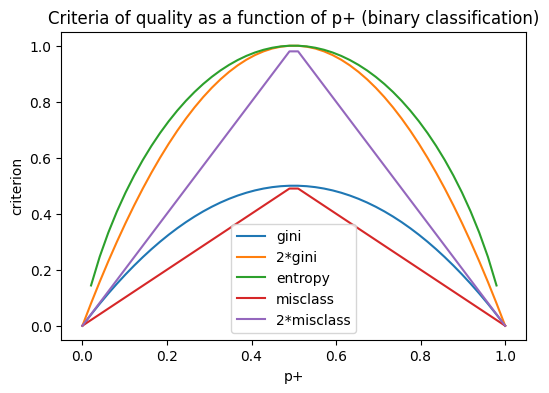

In [6]:
plt.figure(figsize=(6,4))
xx = np.linspace(0,1,50)
plt.plot(xx,[2*x*(1-x) for x in xx],label = 'gini')
plt.plot(xx,[4*x*(1-x) for x in xx],label = '2*gini')
plt.plot(xx,[-x*np.log2(x)-(1-x)*np.log2(1-x) for x in xx],label='entropy')
plt.plot(xx,[1-max(x,1-x) for x in xx],label = 'misclass')
plt.plot(xx,[2*(1-max(x,1-x)) for x in xx],label = '2*misclass')
plt.xlabel('p+')
plt.ylabel("criterion")
plt.title('Criteria of quality as a function of p+ (binary classification)')
plt.legend()

In [13]:
# 下面用决策树拟合一些例子
np.random.seed(17)
# 第一类
train_data = np.random.normal(size=(100,2))
train_labels = np.zeros(100)

# 第二类
train_data = np.r_[train_data,np.random.normal(size = (100,2),loc = 2)]
train_labels = np.r_[train_labels,np.ones(100)]



下面绘制数据。通俗地讲，这种情况下的分类问题就是构造一个「边界」，能够较好的分开两个类别（红点和黄点）。这个「边界」若是一条直线的话可能太过简单，若是沿着每个红点画出的蛇形曲线又太过复杂（这将导致其在新数据上的表现很差）。从直觉上说，某种平滑的边界，在新数据上的效果会比较好。

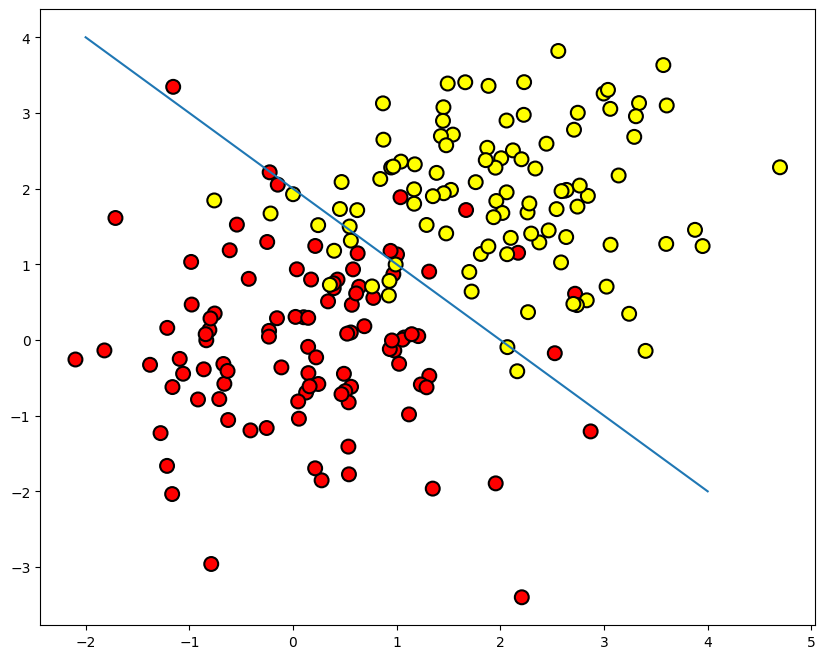

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.plot(range(-2, 5), range(4, -3, -1))

In [19]:
# 训练
from sklearn.tree import DecisionTreeClassifier
def get_grid(data):
    x_min,x_max = data[:,0].min()-1,data[:,0].max()+1
    y_min,y_max = data[:,0].min()-1,data[:,1].max()+1
    return np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))

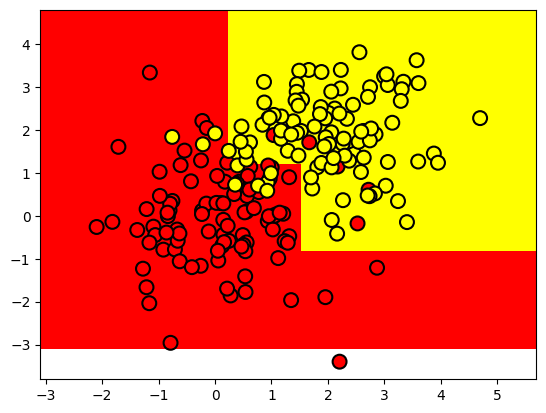

In [23]:
# max_depth 参数限制决策树的深度
clf_tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=17)
clf_tree.fit(train_data,train_labels)
xx,yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape) # 将切片对象转换为沿第二轴的连接
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5)


sklearn.tree.DecisionTreeClassifier 类的主要参数为：

- max_depth 树的最大深度；
- max_features 搜索最佳分区时的最大特征数（特征很多时，设置这个参数很有必要，因为基于所有特征搜索分区会很「昂贵」）；
- min_samples_leaf 叶节点的最少样本数。

$ℓ$是叶节点中的样本数，$y_i$是目标变量的值。简单来说，通过最小化方差，使每个叶子中的目标特征的值大致相等，以此来划分训练集的特征。
$$
D = \frac{1}{\ell} \sum_{i=1}^{\ell} \left( y_i - \frac{1}{\ell} \sum_{j=1}^{\ell} y_j \right)^2,
$$


让我基于下列函数生成一些数据
$$ f(x)=e^{(-x^2)}+1.5*e^{-(x-2)^2}$$

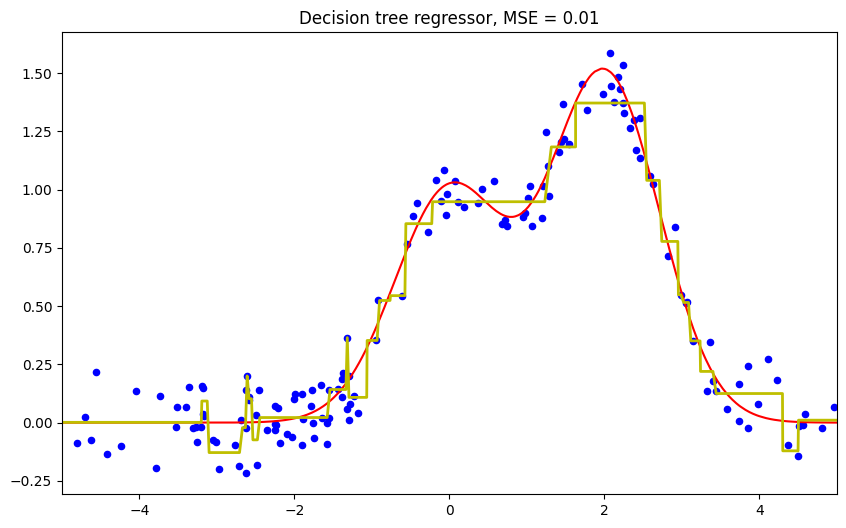

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel() # 返回展平的数组 ,浅拷贝
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples,noise):
    X = np.random.rand(n_samples)*10-5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
        np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)
reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "y", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" %
          (np.sum((y_test - reg_tree_pred) ** 2) / n_test))
plt.show()